In [1]:
import numpy as np
import skimage as ski
from skimage import io, color, exposure, img_as_float
import matplotlib.pyplot as plt
from scipy import signal

#Edge detection

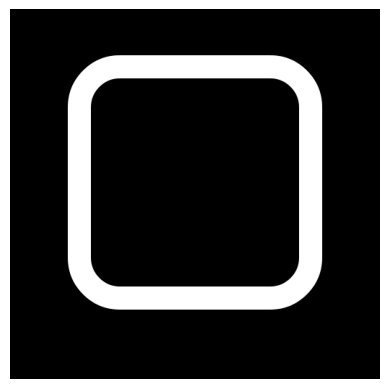

(512, 512)


In [2]:
# Load square.png
I = io.imread('square.png')

# Normalize the image
I = img_as_float(I)


I = I[:,:,3]

plt.imshow(I, cmap = 'gray')
plt.axis("off")
plt.show()

print(I.shape)

Implement these filters -

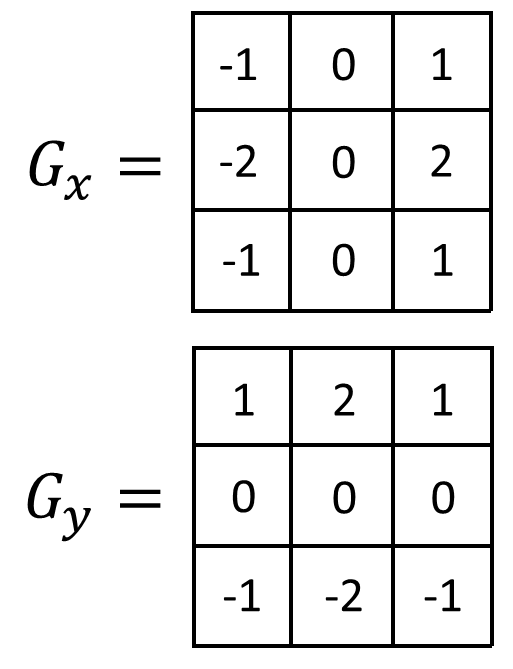

In [3]:
# Define the filter here
g_x = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])

g_y = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])


print("Gx - \n", g_x)
print("\nGy -\n", g_y)

Gx - 
 [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]

Gy -
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


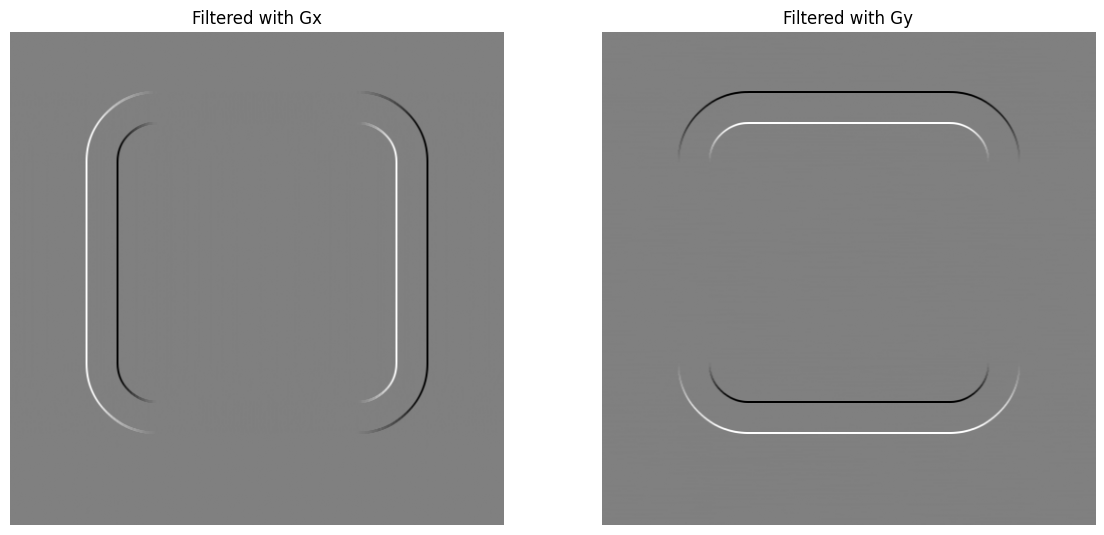

Ix shape -  (510, 510)
Iy shape -  (510, 510)


In [4]:
# Apply these kernel on the image
# Use cross correlation operation
# Ensure the image size remain same after filtering
I_x = signal.correlate(I,g_x,mode='valid') # Filter using g_x
I_y = signal.correlate(I, g_y, mode='valid') # Filter using g_y


fig = plt.figure(figsize=(14, 8))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(I_x, cmap = 'gray')
ax1.title.set_text("Filtered with Gx")
ax1.axis("off")

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(I_y, cmap = 'gray')
ax2.title.set_text("Filtered with Gy")
ax2.axis("off")

plt.show()

print("Ix shape - ", I_x.shape)
print("Iy shape - ", I_y.shape)

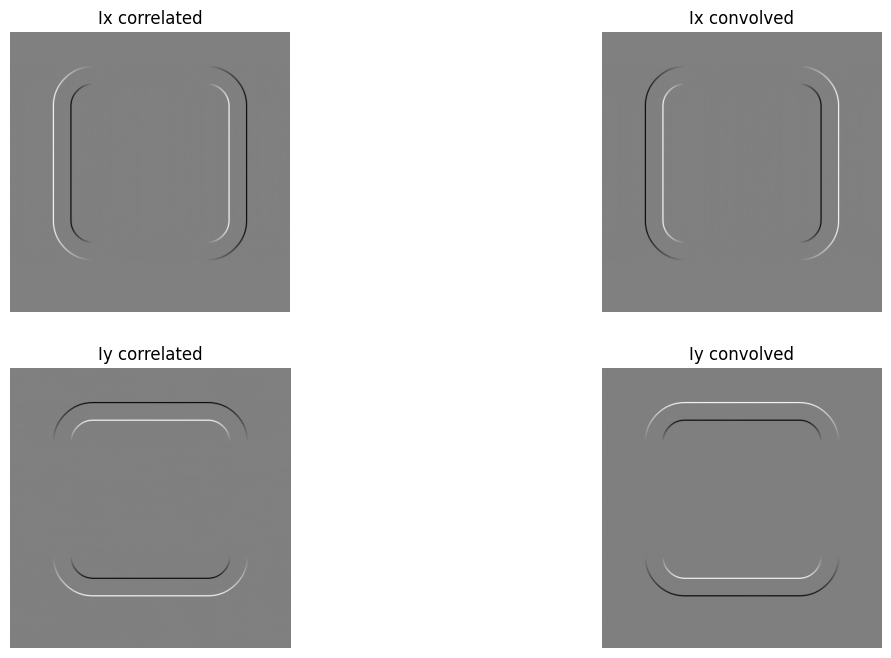

Ix (convolved) shape -  (510, 510)
Iy (convolved) shape -  (510, 510)


In [5]:
# Apply the kernels again on the original image but using convolution operation
# Ensure image dimensions are preserved
I_x_conv = signal.convolve(I, g_x, mode='valid') # Filter using g_x
I_y_conv = signal.convolve(I, g_y, mode='valid') # Filter using g_y

fig = plt.figure(figsize=(14, 8))

ax1 = fig.add_subplot(2,2,1)
ax1.imshow(I_x, cmap = 'gray')
ax1.title.set_text("Ix correlated")
ax1.axis("off")

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(I_x_conv, cmap = 'gray')
ax2.title.set_text("Ix convolved")
ax2.axis("off")


ax3 = fig.add_subplot(2,2,3)
ax3.imshow(I_y, cmap = 'gray')
ax3.title.set_text("Iy correlated")
ax3.axis("off")


ax4 = fig.add_subplot(2,2,4)
ax4.imshow(I_y_conv, cmap = 'gray')
ax4.title.set_text("Iy convolved")
ax4.axis("off")

plt.show()

print("Ix (convolved) shape - ", I_x_conv.shape)
print("Iy (convolved) shape - ", I_y_conv.shape)

**Q. Are the operations symmetrical?**

*Answer -*

# Localized histeq

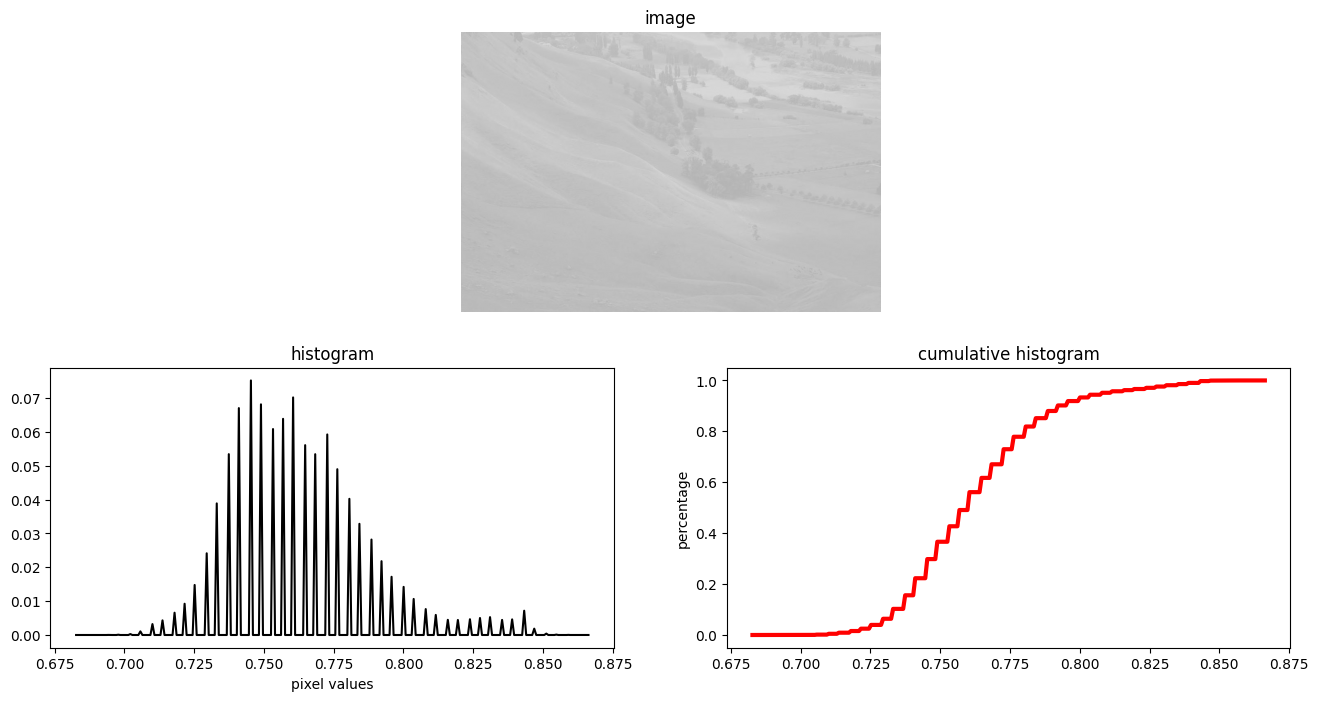

In [6]:
# Load the "land.jpeg" image
I = io.imread('land.jpeg')

# Normalize the image using img_to_float
I = img_as_float(I)

# Calculate the histogram
hist, bins = exposure.histogram(I,nbins=256,normalize=True)

# Calculate the cumulative histogram
chist, cbins = exposure.cumulative_distribution(I,nbins=256)


plt.rcParams['figure.figsize'] = (16, 8)
plt.subplot(2, 1, 1)
plt.imshow(I, cmap = 'gray', vmin=0, vmax=1)
plt.axis("off")
plt.title("image")

plt.subplot(2, 2, 3)
plt.plot(bins, hist, 'k')
plt.xlabel("pixel values")
plt.title("histogram")

plt.subplot(2, 2, 4)
plt.plot(cbins,chist, 'r', lw=3)
plt.ylabel("percentage")
plt.title("cumulative histogram")

plt.show()

In [7]:
# Perform global histogram equalization on the image
I_histeq = exposure.equalize_hist(I)

# Calculate the histogram of the globally equalized image
hist_I_histeq, bins_I_histeq = exposure.histogram(I_histeq,nbins=256,normalize=True)

# Perform adaptive histogram equalization (AHE) with kernel size = (41, 41)
I_ahe = exposure.equalize_adapthist(I,kernel_size=(41,41))

# Calculate the histogram of the AHE equalized image
hist_I_ahe, bins_I_ahe = exposure.histogram(I_ahe,nbins=256,normalize=True)

# Perform CLAHE with kernel size = (41, 41) and clip limit = 0.05
I_clahe = exposure.equalize_adapthist(I,kernel_size=(41,41),clip_limit=0.05)

# Calculate the histogram of the CLAHE equalized image
hist_I_clahe, bins_I_clahe = exposure.histogram(I_clahe,nbins=256,normalize=True)

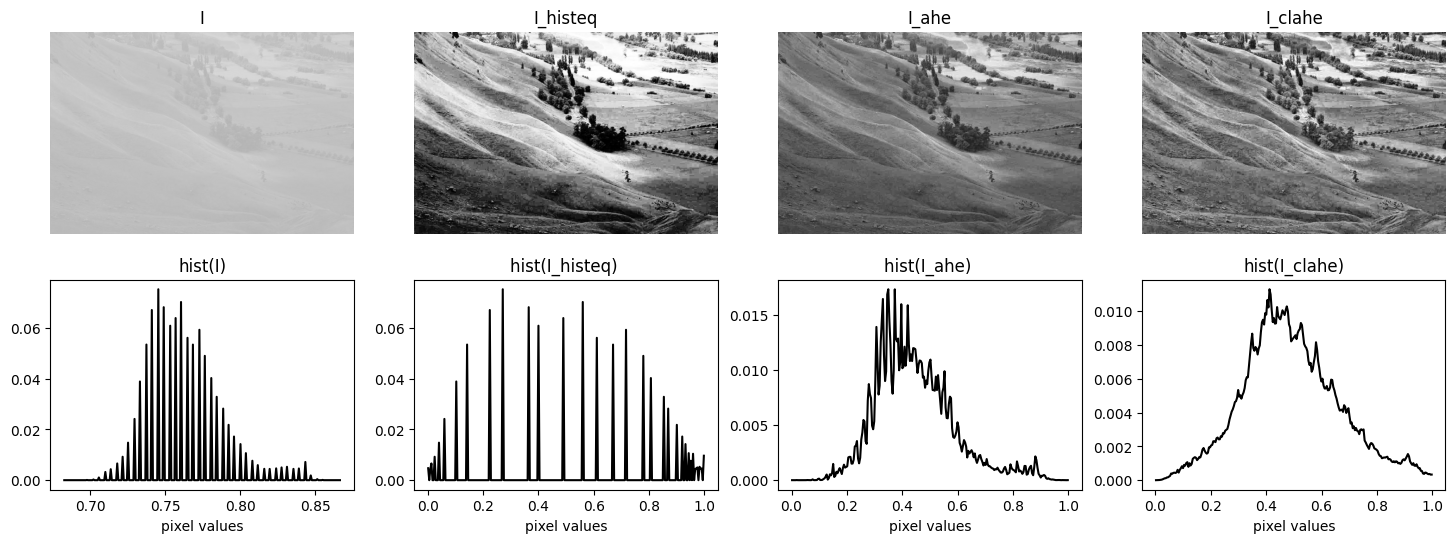

In [8]:
plt.rcParams['figure.figsize'] = (18,6)
plt.subplot(2, 4, 1)
plt.imshow(I, cmap = 'gray', vmin=0, vmax=1)
plt.axis("off")
plt.title("I")

plt.subplot(2, 4, 2)
plt.imshow(I_histeq, cmap = 'gray', vmin=0, vmax=1)
plt.axis("off")
plt.title("I_histeq")

plt.subplot(2, 4, 3)
plt.imshow(I_ahe, cmap = 'gray', vmin=0, vmax=1)
plt.axis("off")
plt.title("I_ahe")

plt.subplot(2, 4, 4)
plt.imshow(I_clahe, cmap = 'gray', vmin=0, vmax=1)
plt.axis("off")
plt.title("I_clahe")

plt.subplot(2, 4, 5)
plt.plot(bins, hist, 'k')
plt.xlabel("pixel values")
plt.title("hist(I)")

plt.subplot(2, 4,6)
plt.plot(bins_I_histeq,hist_I_histeq , 'k')
plt.xlabel("pixel values")
plt.title("hist(I_histeq) ")

plt.subplot(2, 4, 7)
plt.plot(bins_I_ahe ,hist_I_ahe, 'k')
plt.xlabel("pixel values")
plt.title("hist(I_ahe) ")

plt.subplot(2, 4, 8)
plt.plot(bins_I_clahe,hist_I_clahe, 'k')
plt.xlabel("pixel values")
plt.title("hist(I_clahe)")

plt.show()